<table width=100%>
    <col width=200>
    <tr>
        <td bgcolor="#eee" style="text-align:left" colspan="2">
            <font size="5"><b>Analysis of COVID-19 Infections and Death Data of Brazil</b></font></td>
    <tr>
    <tr>
        <td bgcolor="#eee" style="text-align:left"><b>Project creation date:</b> </td>
        <td bgcolor="#eee" style="text-align:left"> May 6, 2020 </td>
    </tr>
        <td bgcolor="#eee" style="text-align:left"><b>Dataset from Ministry of Health:</b> </td>
        <td bgcolor="#eee" style="text-align:left">  <a href="https://covid.saude.gov.br">https://covid.saude.gov.br</a> </td>
    </tr>
    <tr>
        <td bgcolor="#eee" style="text-align:left"><b>Project author:</b> </td>
        <td bgcolor="#eee" style="text-align:left"> Ricardo Szczerbacki (<a href="mailto:ricardo@rj1.info">ricardo@rj1.info</a>) </td>
    </tr>
    <tr>
        <td bgcolor="#eee" style="text-align:left"><b>Project on Github:</b></td>
        <td bgcolor="#eee" style="text-align:left"><a href="https://github.com/ricardocopa/Covid19">https://github.com/ricardocopa/Covid19</a></td>
    </tr>
    <tr>
        <td bgcolor="#eee" style="text-align:left"><b>License:</b></b></td>
        <td bgcolor="#eee" style="text-align:left"><a href="license.html">MIT License</a></td></a> 
    </tr>
    
</table>

In [1]:
import numpy as np
import pandas as pd
from IPython.display import HTML
from datetime import datetime

import locale
locale.setlocale(locale.LC_ALL, 'en_us.utf-8')

import warnings
warnings.filterwarnings('ignore')


In [2]:
    display(HTML('''
    <link rel="stylesheet" href="https://cdn.jupyter.org/notebook/5.1.0/style/style.min.css">
    <script>
        code_show=true; 
        
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
            } else {
                $('div.input').show();
            }
            code_show = !code_show
        } 
        $( document ).ready(code_toggle);
    </script>
    
    Python source code is hidden by default for better visualization.
    To toggle source code visualization click <a href="javascript:code_toggle()">here</a>.'''))

### Loading Dataset
File __HIST_PAINEL_COVIDBR_{date}.xlsx__ downloaded from brazilian Ministry of Health <br>
<br>
File contents (first 5 rows):

In [3]:
# how files where made available until May 10 2020 
# covid = pd.read_csv('arquivo_geral.csv', delimiter = ';') 
covidFull = pd.read_excel('HIST_PAINEL_COVIDBR_29jun2020.xlsx', sheet_name='Sheet 1')
print('Columns: Region, State, City, State Code, City Code, Health Region Code, Health Region Name,  Date, Week, Population 2019, Total Infections, New Infections, Total Deaths, New Deaths, Total Recovered, New Patients')
display(covidFull.head())

# converting to the old file format
covid = covidFull[covidFull.estado.notnull()]
covid = covid[covid.codmun.isnull()]
covid.data = covid.data.dt.strftime('%Y-%m-%d')
covid = covid[['regiao', 'estado', 'data', 'casosNovos', 'casosAcumulado', 'obitosNovos', 'obitosAcumulado']]
covid.columns = ['regiao', 'estado', 'data', 'casosNovos', 'casosAcumulados', 'obitosNovos', 'obitosAcumulados'] 

Columns: Region, State, City, State Code, City Code, Health Region Code, Health Region Name,  Date, Week, Population 2019, Total Infections, New Infections, Total Deaths, New Deaths, Total Recovered, New Patients


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,FgMetro
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


### Some Information About the Dataset

In [4]:
firstDateData = datetime.strptime(covid['data'].min(), '%Y-%m-%d').strftime('%d/%m/%Y')  
lastDayData = datetime.strptime(covid['data'].max(), '%Y-%m-%d').strftime('%d/%m/%Y')  
numberOfDaysData = covid['data'].nunique()


covidMaxDeaths = covid.sort_values('obitosNovos', ascending = False).iloc[0]
maxDeathsValue = covidMaxDeaths['obitosNovos']
maxDeathsState = covidMaxDeaths['estado']
maxDeathsDay = datetime.strptime(covidMaxDeaths['data'], '%Y-%m-%d').strftime('%d/%m/%Y') 

covidMaxDeathsBR = covid.groupby('data')['obitosNovos'].sum().reset_index(name ='obitosNovos')
covidMaxDeathsBR = covidMaxDeathsBR.sort_values('obitosNovos', ascending = False).iloc[0]
maxDeathsValueBR = covidMaxDeathsBR['obitosNovos']
maxDeathsDayBR = datetime.strptime(covidMaxDeathsBR['data'], '%Y-%m-%d').strftime('%d/%m/%Y') 

html_code = '''
<div style="
  background-color:LightGoldenRodYellow;
  border-style: solid;
  padding-top: 10px;
  padding-right: 10px;
  padding-bottom: 20px;
  padding-left: 10px;">
<img style="float: right;" width=30px, height=30px src="info2.png"> 
<p style="font-size:18px"> The file have data from <b>{}</b> to <b>{}</b></p>
<p style="font-size:18px"> The state of <b>{}</b> had the greater number of deaths in one day. There were <b>{:n}</b> deaths on <b>{}</b>. </p>
<p style="font-size:18px"> The day with the greater number of deaths all over Brazil happend on <b>{}</b>, with a total of <b>{:n}</b> deaths registered. </p>
<p style="font-size:18px"> <b>PS</b>: All dates in this page are displayed in the format: DD/MM/YYYY</p>
</div>

'''.format(firstDateData, lastDayData, maxDeathsState, maxDeathsValue, maxDeathsDay, maxDeathsDayBR,maxDeathsValueBR)

display(HTML(html_code))



In [5]:
# Creating normalized columns for infections and deaths by dividing it by the population multiplied by a million (cases per million people). Source for brazilian population data: IBGE population estimation for 2019
# https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

data = {'state': ['AC','AL','AP','AM','BA','CE','DF',
                   'ES','GO','MA','MT','MS','MG','PA',
                   'PB','PR','PE','PI','RJ','RN','RS',
                   'RO','RR','SC','SP','SE','TO'],
        'population': [881935, 3337357, 845731, 4144597, 14873064, 9132078, 3015268, 
                       4018650, 7018354, 7075181, 3484466, 2778986, 21168791, 8602865,
                       4018127, 11433957, 9557071, 3273227, 17264943, 3506853, 11377239,
                       1777225, 605761, 7164788, 45919049, 2298696, 1572866]
       }

populationByState = pd.DataFrame (data, columns = ['state','population'])

covid = covid.merge(populationByState, left_on='estado', right_on='state')

covid['normTotalInfections'] = covid['casosAcumulados']/covid['population'] * 1000000.
covid['normTotalDeaths'] = covid['obitosAcumulados']/covid['population'] * 1000000.


### Infections and  deaths in Brazil and Rio de Janeiro

In [6]:
lastDay = covid['data'].max()
lastDayFormatted = datetime.strptime(lastDay, '%Y-%m-%d').strftime('%d/%m/%Y')

covidLastDay = covid.loc[covid['data'] == lastDay]

infectionsBR = covidLastDay.sum()['casosAcumulados']
deathsBR = covidLastDay.sum()['obitosAcumulados']
infectionsLastDayBR = covidLastDay.sum()['casosNovos']
deathsLastDayBR = covidLastDay.sum()['obitosNovos']

covidRJ = covidLastDay.loc[covid['estado'] == 'RJ']

infectionsLastDayRJ = covidRJ.sum()['casosNovos']
deathsLastDayRJ = covidRJ.sum()['obitosNovos']
infectionsRJ = covidRJ.sum()['casosAcumulados']
deathsRJ = covidRJ.sum()['obitosAcumulados']

html_code = '''
<div style="
  background-color:LightGoldenRodYellow;
  border-style: solid;
  padding-top: 10px;
  padding-right: 10px;
  padding-bottom: 20px;
  padding-left: 10px;">
<img style="float: right;" width=30px, height=30px src="info2.png"> 
<p style="font-size:18px"> <b>{}</b> is the last day in the dataset.</p>
<p>
<p style="font-size:18px"> <b>{:n} infections</b> were confirmed in <b>Brazil</b> on this day, of <b>{:n} total infections</b>. </p>
<p style="font-size:18px"> <b>{:n} deaths</b> were confirmed in <b>Brazil</b> on this day, of <b>{:n} total deaths</b>. </p>
<p>
<p style="font-size:18px"> <b>{:n} infections</b> were confirmed in <b>Rio de Janeiro</b> on this day, of <b>{:n} total infections</b>. </p>
<p style="font-size:18px"> <b>{:n} deaths</b> were confirmed in <b>Rio de Janeiro</b> on this day, of <b>{:n} total deaths</b>. </p>
</div>

'''.format(lastDayFormatted, infectionsLastDayBR, infectionsBR, deathsLastDayBR, deathsBR,
          infectionsLastDayRJ, infectionsRJ, deathsLastDayRJ, deathsRJ)

display(HTML(html_code))


### Last 10 days in Rio de Janeiro

In [7]:
covidRJ = covid.loc[covid['estado'] == 'RJ'][['data', 'estado', 'casosNovos', 'obitosNovos']]
covidRJ.columns = ['Date', 'State', 'New Infections', 'New Deaths'] 
display(covidRJ.tail(10))

,Date,State,New Infections,New Deaths
2384,2020-06-20,RJ,2159,229
2385,2020-06-21,RJ,596,51
2386,2020-06-22,RJ,1439,58
2387,2020-06-23,RJ,3297,220
2388,2020-06-24,RJ,2624,142
2389,2020-06-25,RJ,2404,155
2390,2020-06-26,RJ,2600,137
2391,2020-06-27,RJ,306,202
2392,2020-06-28,RJ,2495,30
2393,2020-06-29,RJ,585,29


### Infections and deaths by state
Sorted by the severity (deaths per million people). States in worst situation are near the top.

In [8]:
covidLastDay = covidLastDay[['estado','casosAcumulados', 'obitosAcumulados', 'normTotalInfections', 'normTotalDeaths']]
covidLastDay.sort_values('normTotalDeaths', ascending=False, inplace=True)
covidLastDay.set_index('estado', inplace=True)
covidLastDay2 = covidLastDay.copy()
covidLastDay2.columns = ['Infections', 'Deaths', 'Infections/MM inh.', 'Deaths/MM inh.']
display(covidLastDay2)

,Infections,Deaths,Infections/MM inh.,Deaths/MM inh.
estado,,,,
AM,69893,2792,16863.641990,673.648125
CE,108225,6076,11851.081430,665.346923
RJ,111883,9848,6480.357335,570.404432
PA,101207,4870,11764.336648,566.090483
PE,58476,4782,6118.611026,500.362506
AP,28253,413,33406.603282,488.334943
RR,14459,281,23869.149714,463.879319
AC,13146,361,14905.860409,409.327218
ES,45097,1621,11221.927762,403.369291


In [9]:
html_code = '''
<div style="
  background-color:LightGoldenRodYellow;
  border-style: solid;
  padding-top: 10px;
  padding-right: 10px;
  padding-bottom: 40px;
  padding-left: 10px;">
<img style="float: right;" width=30px, height=30px src="info2.png"> 
<h2> Cluestering the states in 3 classes, by severity </h2>
<p style="font-size:18px"> The kmeans method was used for cluestering. </p>
</div>
'''
display(HTML(html_code))

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

covidLastDay['myClass'] = kmeans.fit_predict(covidLastDay[['normTotalDeaths']])

In [11]:
worstClass = covidLastDay.iloc[0]['myClass']
bestClass = covidLastDay.iloc[-1]['myClass']

def highlight(s):
    tamanho = s.size
    if s.myClass == worstClass:
        return ['background-color: orange']*tamanho
    elif s.myClass != bestClass:
        return ['background-color: yellow']*tamanho
    else:
        return ['background-color: white']*tamanho

covidLastDay.reset_index(inplace=True)

covidLastDay2 = covidLastDay.copy()

covidLastDay2.columns=['State', 'Infections', 'Deaths', 'Infections/MM inhab.', 'Deaths/MM inhab.', 'myClass']

display(covidLastDay2.style.apply(highlight, axis=1))

    

,State,Infections,Deaths,Infections/MM inhab.,Deaths/MM inhab.,myClass
0,AM,69893,2792,16863.6,673.648,1
1,CE,108225,6076,11851.1,665.347,1
2,RJ,111883,9848,6480.36,570.404,1
3,PA,101207,4870,11764.3,566.09,1
4,PE,58476,4782,6118.61,500.363,1
5,AP,28253,413,33406.6,488.335,1
6,RR,14459,281,23869.1,463.879,1
7,AC,13146,361,14905.9,409.327,2
8,ES,45097,1621,11221.9,403.369,2
9,SP,275145,14398,5991.96,313.552,2


### Comparing Infections and Deaths by State
Using absolute values

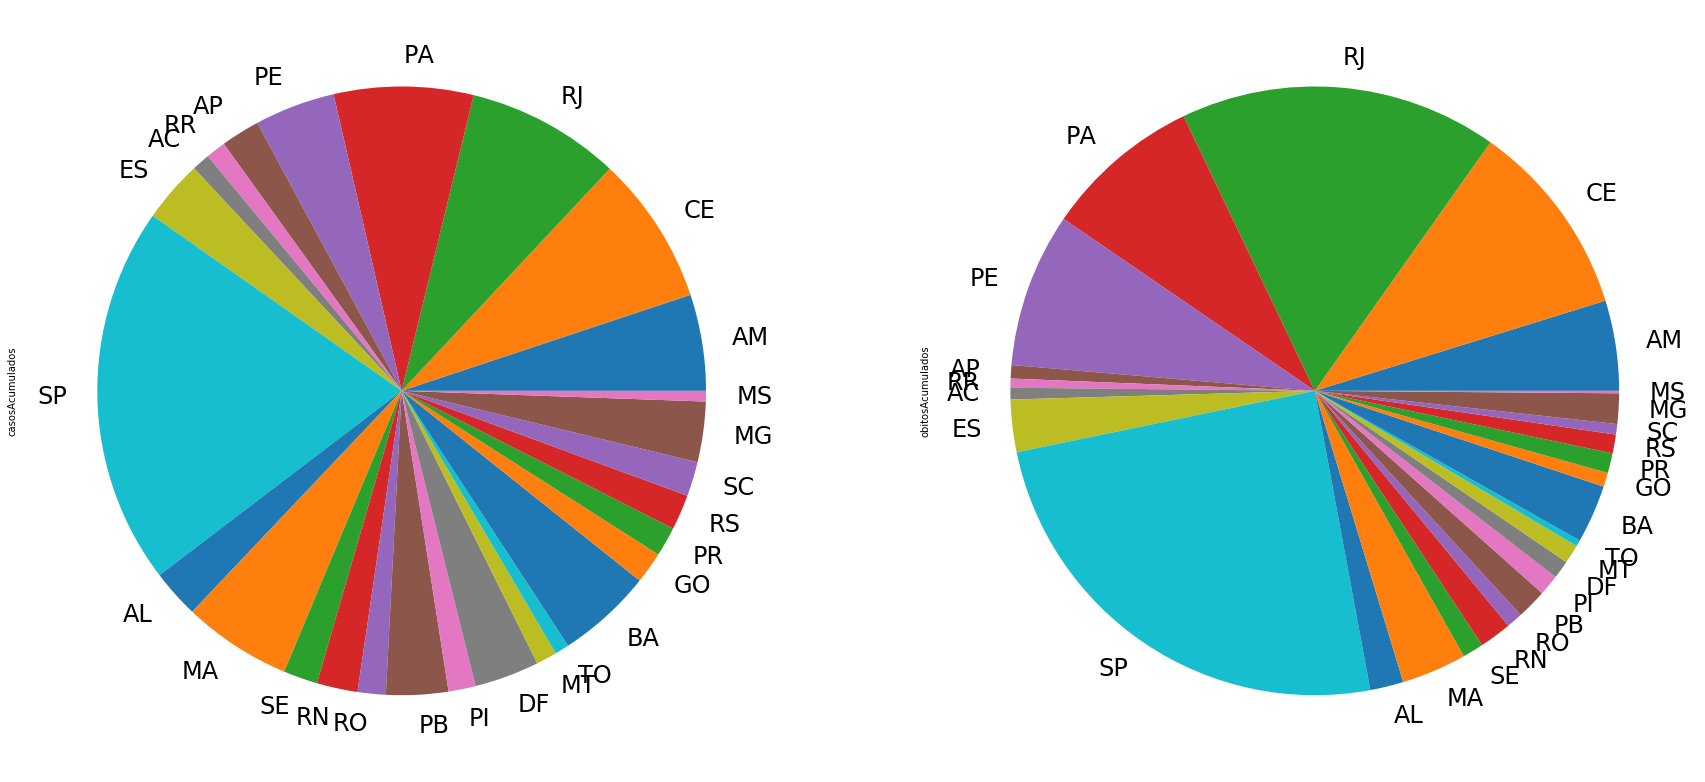

In [12]:
covidLastDayPie1 = covidLastDay[['estado','casosAcumulados', 'obitosAcumulados']]
covidLastDayPie1.set_index('estado', inplace=True)
plot = covidLastDayPie1.plot.pie(fontsize=24, subplots=True, layout=(1, 2), figsize=(30, 15), legend=None)

### Comparing Infections and Deaths per Million Inhabitans, per State

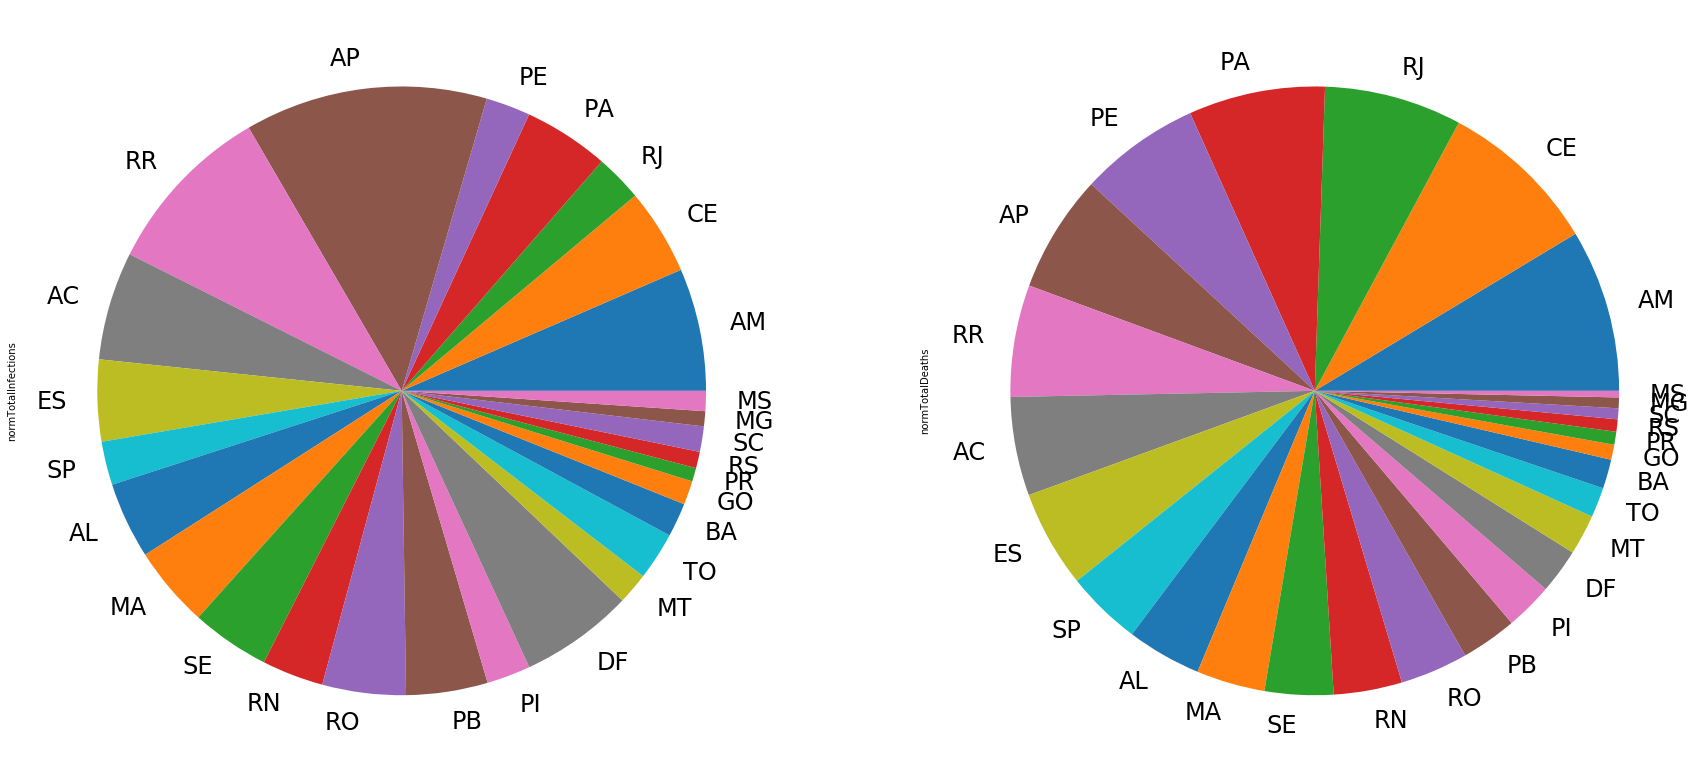

In [13]:
covidLastDayPie2 = covidLastDay[['estado','normTotalInfections', 'normTotalDeaths']]
covidLastDayPie2.set_index('estado', inplace=True)
plot = covidLastDayPie2.plot.pie(fontsize=24, subplots=True, layout=(1, 2), figsize=(30, 15), legend=None)

### Plots of daily infections and deaths

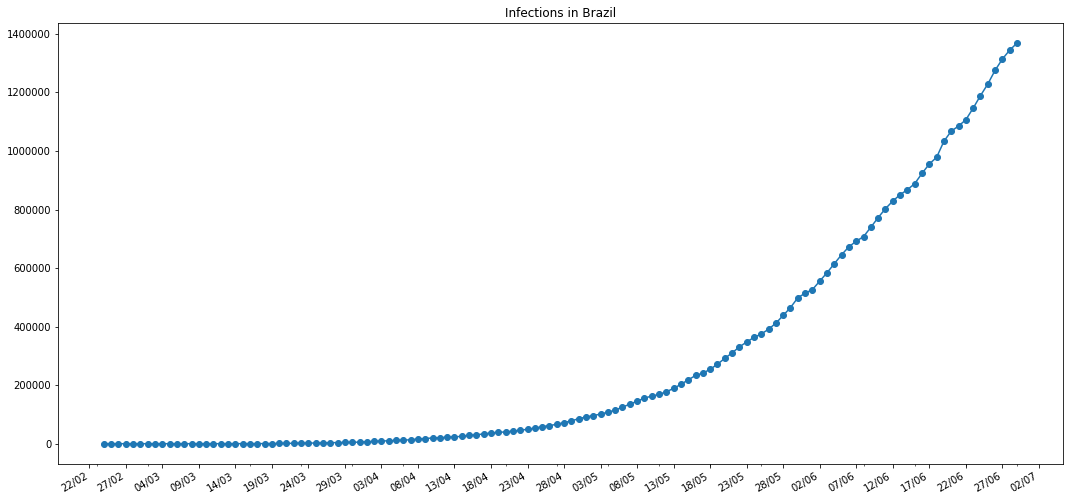

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

covid['data'] = pd.to_datetime(covid['data'], format='%Y-%m-%d')

covidByDayBR = covid[['data', 'casosAcumulados', 'obitosAcumulados']].groupby('data').sum()
covidByDayBR.reset_index(inplace=True)
covidByDayBR.set_index(['data'],inplace=True)

covidByDayRJ = covid.loc[covid['estado'] == 'RJ'][['data', 'casosAcumulados', 'obitosAcumulados', 'normTotalInfections', 'normTotalDeaths']]

axis = covidByDayBR.plot(legend=False, style='o-', figsize=(18, 9), y='casosAcumulados', title='Infections in Brazil')
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

plt.show()

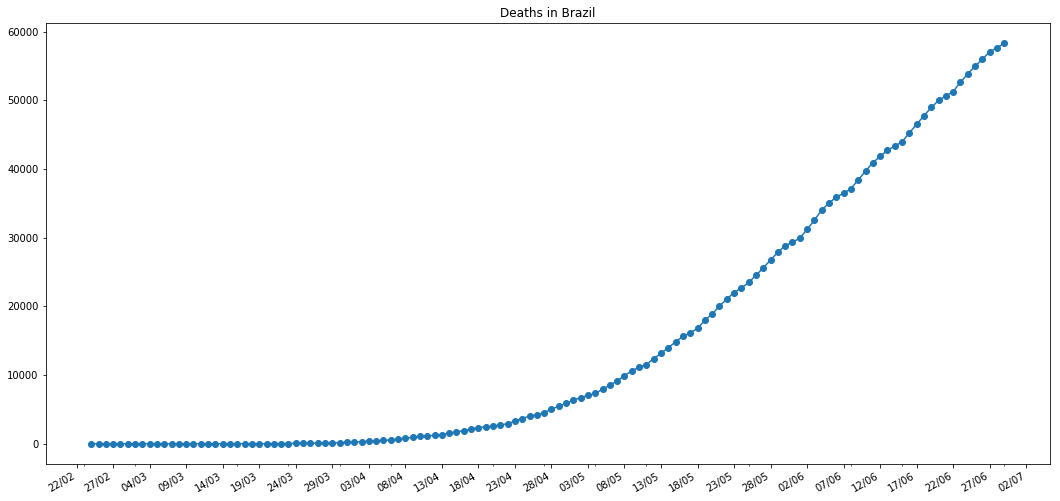

In [15]:
axis = covidByDayBR.plot(legend=False, style='o-',figsize=(18, 9), y='obitosAcumulados', title='Deaths in Brazil')
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

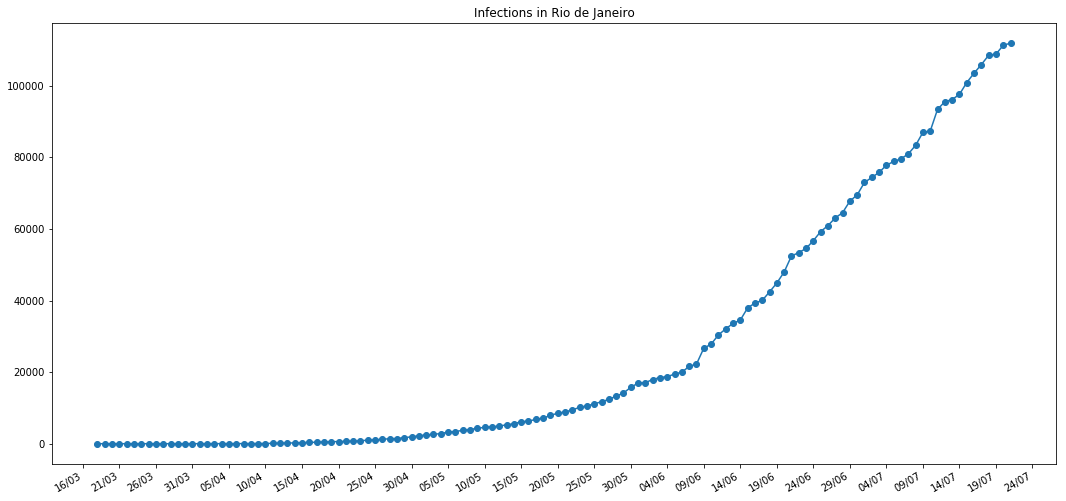

In [16]:
axis = covidByDayRJ.plot(legend=False,style='o-',figsize=(18, 9), y='casosAcumulados', title='Infections in Rio de Janeiro')
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

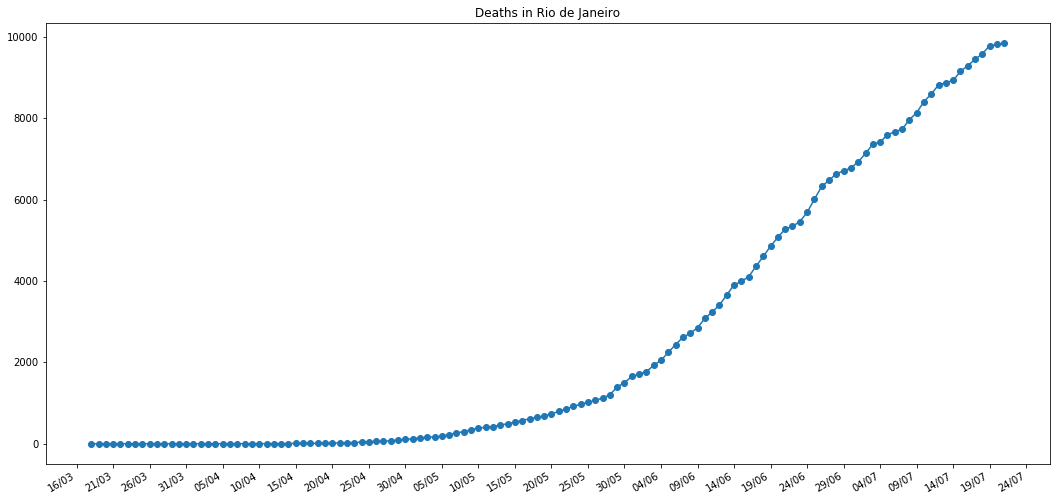

In [17]:
axis = covidByDayRJ.plot(legend=False, style='o-',figsize=(18, 9), y='obitosAcumulados', title='Deaths in Rio de Janeiro')
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

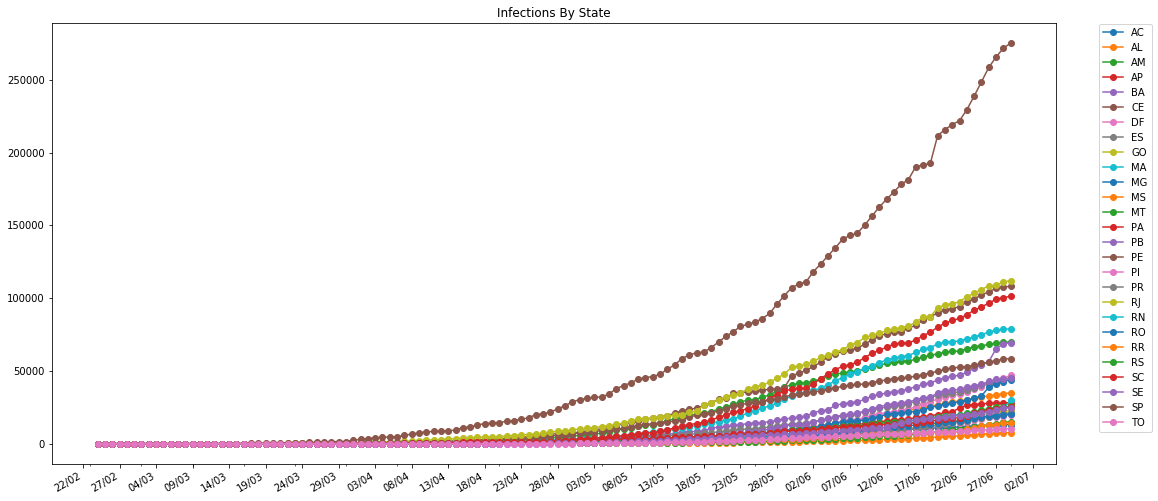

In [18]:
infectionsByDayStates = covid.pivot(index='data', columns='estado', values = 'casosAcumulados')
axis = infectionsByDayStates.plot(style='o-',figsize=(18, 9), title='Infections By State')
axis.legend(bbox_to_anchor=(1.1, 1.01))
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

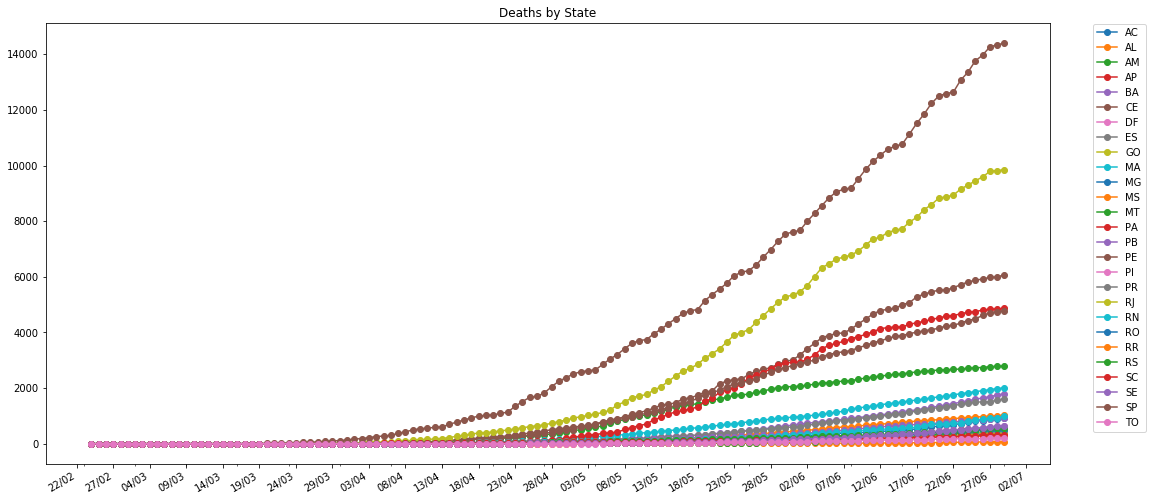

In [19]:
deathsByDayStates = covid.pivot(index='data', columns='estado', values = 'obitosAcumulados')
axis = deathsByDayStates.plot(style='o-',figsize=(18, 9), title='Deaths by State')
axis.legend(bbox_to_anchor=(1.1, 1.01))
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

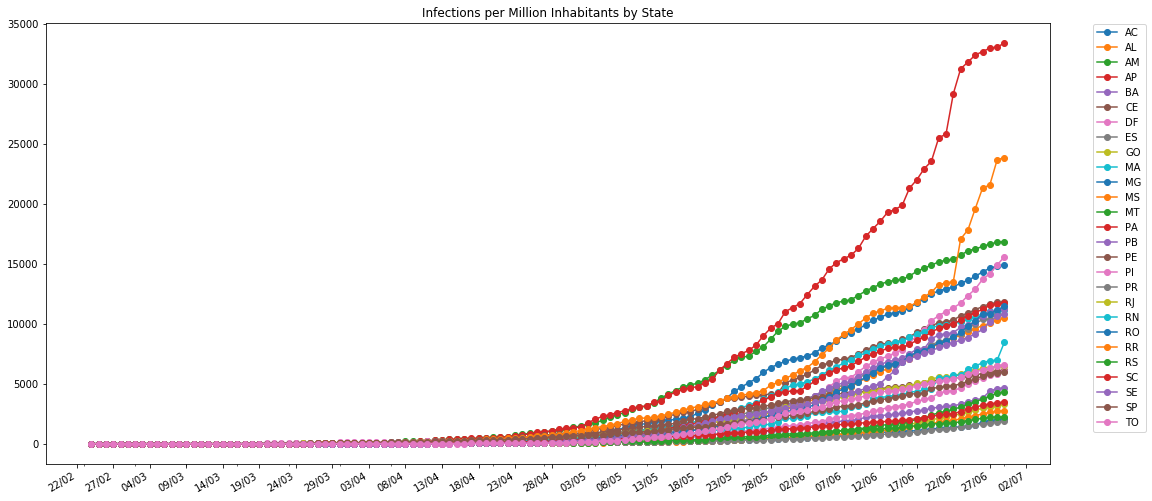

In [20]:
infectionsByDayStates = covid.pivot(index='data', columns='estado', values = 'normTotalInfections')
axis = infectionsByDayStates.plot(style='o-',figsize=(18, 9), title='Infections per Million Inhabitants by State')
axis.legend(bbox_to_anchor=(1.1, 1.01))
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

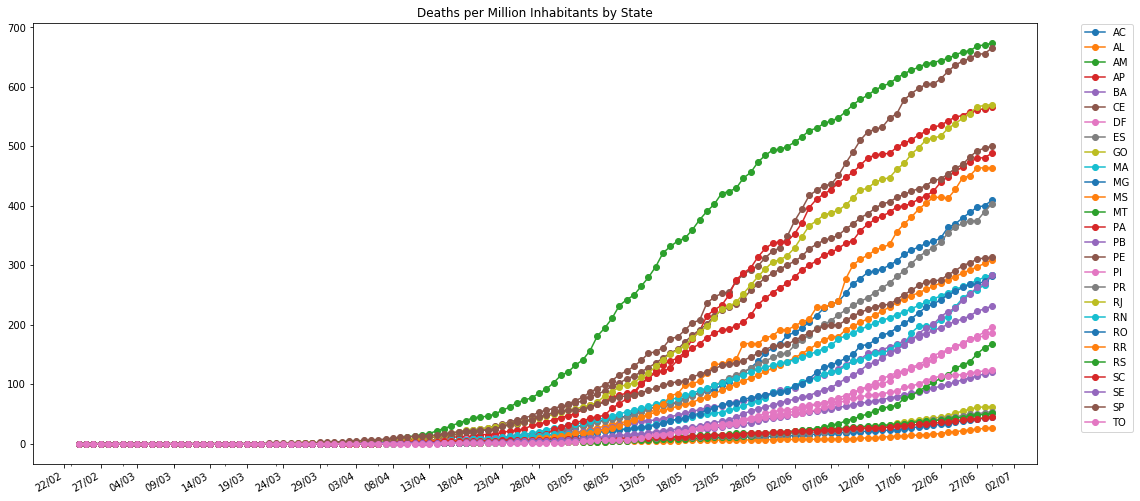

In [21]:
deathsByDayStates = covid.pivot(index='data', columns='estado', values = 'normTotalDeaths')
axis = deathsByDayStates.plot(style='o-',figsize=(18, 9), title='Deaths per Million Inhabitants by State')
axis.legend(bbox_to_anchor=(1.1, 1.01))
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

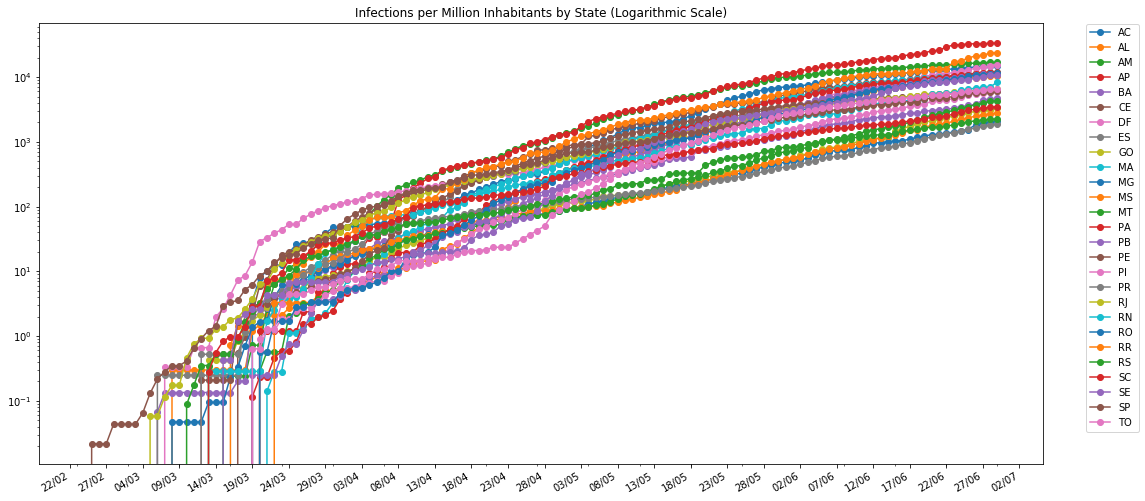

In [22]:
infectionsByDayStates = covid.pivot(index='data', columns='estado', values = 'normTotalInfections')
axis = infectionsByDayStates.plot(logy = True, style='o-',figsize=(18, 9), 
                              title='Infections per Million Inhabitants by State (Logarithmic Scale)')
axis.legend(bbox_to_anchor=(1.1, 1.01))
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

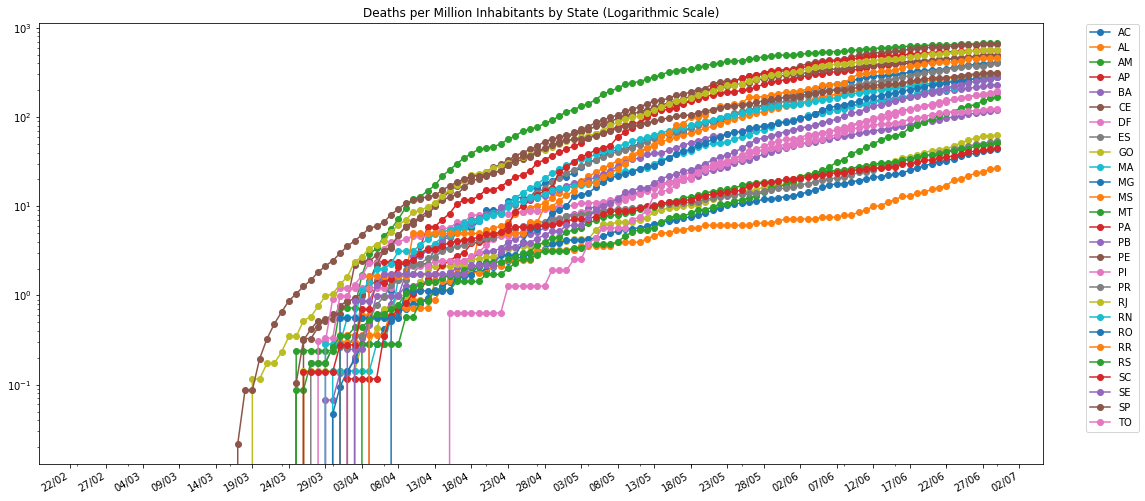

In [23]:
deathsByDayStates = covid.pivot(index='data', columns='estado', values = 'normTotalDeaths')
axis = deathsByDayStates.plot(logy = True, style='o-',figsize=(18, 9), 
                              title='Deaths per Million Inhabitants by State (Logarithmic Scale)')
axis.legend(bbox_to_anchor=(1.1, 1.01))
plt.gcf().autofmt_xdate()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.xaxis.get_label().set_visible(False)

### Comparing tendencies of all states in the last 10 days
For the log of the deaths data of the last 10 days for all states, I use Linear Regressions to estimate and compare how the situation is evolving. Higher coefficients means that situation is getting worse. 

In [24]:
last10Days = deathsByDayStates.tail(10)

display(last10Days)

estado,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
data,,,,,,,,,,,,,,,,,,,,,
2020-06-20,336.759512,259.486774,639.386652,417.390400,90.768116,604.243634,133.984773,322.745201,42.032648,238.015112,...,37.432360,511.093492,198.753697,230.134057,404.449940,37.794758,33.078439,194.893105,272.087516,106.175606
2020-06-21,340.161123,264.880263,641.075598,424.484854,93.524777,604.791155,140.286038,329.961554,43.172516,243.244660,...,39.443913,514.047454,198.753697,234.635457,414.354836,38.146338,34.334582,200.983514,274.134597,111.261862
2020-06-22,345.830475,270.573391,644.453490,439.856172,96.886559,613.660987,148.908820,338.919786,44.312384,248.756887,...,41.018171,517.406863,208.163844,242.512906,414.354836,40.255813,35.730297,213.599362,275.136360,113.169208
2020-06-23,363.972402,275.667242,648.072659,449.315444,100.248342,626.034951,157.531602,354.596693,46.877088,253.986435,...,43.554475,530.149448,213.866963,249.827681,412.704020,41.925813,36.707297,222.299947,284.587775,113.804990
2020-06-24,369.641754,281.060732,653.863331,457.592308,103.610124,636.766353,164.164512,364.052605,51.721529,259.498662,...,45.566028,538.374207,230.120852,256.017105,427.561365,43.947394,38.940440,227.955328,290.772572,115.076555
2020-06-25,379.846587,287.053498,658.930169,465.869171,107.644262,643.336599,168.807549,370.771279,54.713684,264.445531,...,47.140286,547.351937,244.663805,262.769205,447.371158,43.947394,40.336155,241.006205,299.635996,116.348119
2020-06-26,388.917551,292.147349,660.860392,474.146035,110.400923,648.264283,176.435395,375.001555,58.275772,269.392401,...,49.326755,555.287092,253.503640,267.833279,450.672790,47.463185,41.592298,251.881937,304.143929,118.255465
2020-06-27,397.988514,297.540838,668.822566,480.058080,114.098884,654.944034,178.093622,375.001555,61.125443,274.621950,...,50.288802,566.987102,259.206759,267.833279,463.879319,48.693712,42.429727,263.192697,310.611833,121.434375
2020-06-28,400.256255,303.233966,670.752790,481.240489,117.527901,655.929570,181.741722,390.180782,61.980345,280.134176,...,52.387813,568.724727,267.191125,273.460029,463.879319,49.133186,43.546299,269.718136,312.245143,122.070157


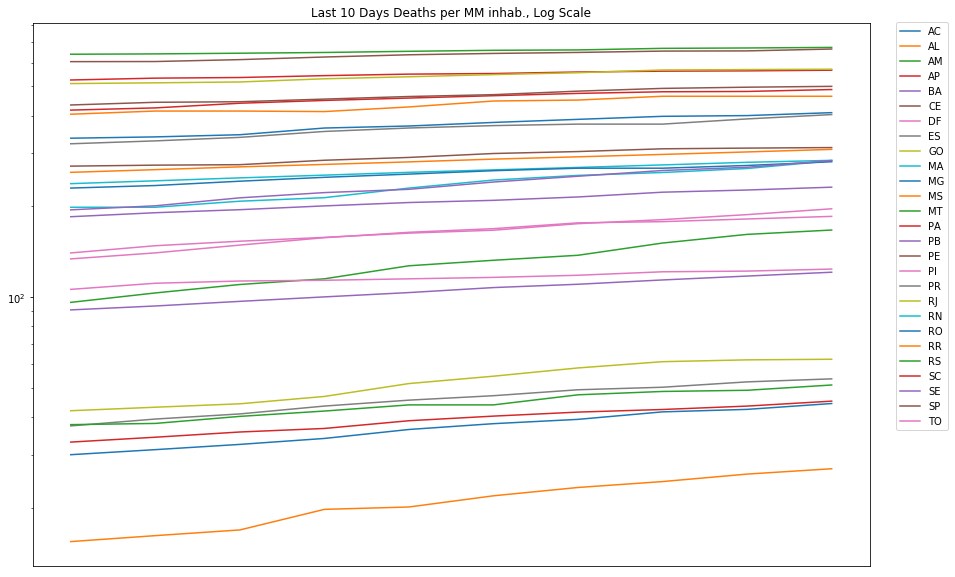

In [25]:
axis = last10Days.plot(logy=True, figsize=(15,10), title='Last 10 Days Deaths per MM inhab., Log Scale').legend(bbox_to_anchor=(1.1, 1.01))
plt.gca().xaxis.get_label().set_visible(False)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.show()

In [26]:
last10Days['day'] = range(1,11)

X_train = last10Days['day']
X_train = X_train.values.reshape(-1, 1)

data = {'state': [],
        'coefficient': []
       }
coef10days = pd.DataFrame (data, columns = ['state','coefficient'])


In [27]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

# Evaluating coefficients 
for col in last10Days.columns: 
    if col != 'day':
        last10Days[col + 'log'] = np.log(last10Days[col])
        regression_model.fit(X_train, last10Days[col + 'log'])
        coef10days = coef10days.append(pd.Series([col, regression_model.coef_[0]], index=coef10days.columns), ignore_index=True)



In [28]:
html_code = '''
<div style="
  background-color:LightGoldenRodYellow;
  border-style: solid;
  padding-top: 10px;
  padding-right: 10px;
  padding-bottom: 40px;
  padding-left: 10px;">
<img style="float: right;" width=30px, height=30px src="info2.png"> 
<h2> Predictions for the Near Future </h2>
<p style="font-size:18px"> Using the linear regression over the log data to estimate the number of deaths in 7, 14 e 30 days. </p>
</div>
'''
display(HTML(html_code))

#### All States

In [29]:
from datetime import timedelta

data = {'date': [],
        'state': [],
        'predictedDeaths': []
       }
predictedDeaths = pd.DataFrame (data, columns = ['date','state', 'predictedDeaths'])

more7Days = 17;
more14Days = 24;
more30Days = 40;
dateMore7Days = (datetime.strptime(lastDay, '%Y-%m-%d') + timedelta(days=7)).strftime("%d/%m/%Y")
dateMore14Days = (datetime.strptime(lastDay, '%Y-%m-%d') + timedelta(days=14)).strftime("%d/%m/%Y")
dateMore30Days = (datetime.strptime(lastDay, '%Y-%m-%d') + timedelta(days=30)).strftime("%d/%m/%Y")

deathsByState = covid.pivot(index='data', columns='estado', values = 'obitosAcumulados')
last10Days = deathsByState.tail(10)
last10Days['day'] = range(1,11)

for col in last10Days.columns: 
    if col != 'day':
        last10Days[col + 'log'] = np.log(last10Days[col])
        regression_model.fit(X_train, last10Days[col + 'log'])
        
        xpredict = np.array([more7Days])
        xpredict = xpredict.reshape(-1,1)
        prediction = regression_model.predict(xpredict)
        predictedDeaths = predictedDeaths.append(pd.Series([dateMore7Days, col, int(np.exp(prediction[0]))], index=predictedDeaths.columns), ignore_index=True)
        
        xpredict = np.array([more14Days])
        xpredict = xpredict.reshape(-1,1)
        prediction = regression_model.predict(xpredict)
        predictedDeaths = predictedDeaths.append(pd.Series([dateMore14Days, col, int(np.exp(prediction[0]))], index=predictedDeaths.columns), ignore_index=True)
        
        xpredict = np.array([more30Days])
        xpredict = xpredict.reshape(-1,1)
        prediction = regression_model.predict(xpredict)
        predictedDeaths = predictedDeaths.append(pd.Series([dateMore30Days, col, int(np.exp(prediction[0]))], index=predictedDeaths.columns), ignore_index=True)
        
predictedDeaths
predictedDeathsOut = predictedDeaths.pivot(index='state', columns='date', values = 'predictedDeaths')

predictedDeathsOut = predictedDeathsOut[[dateMore7Days, dateMore14Days, dateMore30Days]]

predictedDeathsBrazil = predictedDeathsOut.sum().reset_index(name='predictedDeaths')
predictedDeathsBrazil = predictedDeathsBrazil.append(pd.Series([lastDayFormatted, deathsBR], index=predictedDeathsBrazil.columns), ignore_index=True)
predictedDeathsBrazil.set_index('date', inplace=True)
predictedDeathsBrazilOut = predictedDeathsBrazil.transpose()
predictedDeathsBrazilOut = predictedDeathsBrazilOut[[lastDayFormatted, dateMore7Days, dateMore14Days, dateMore30Days]]

predictedDeathsOut['state'] = predictedDeathsOut.index
covidLastDayOut = covidLastDay[['estado', 'obitosAcumulados']][['estado', 'obitosAcumulados']]
covidLastDayOut
predictedDeathsOut = predictedDeathsOut.merge(covidLastDayOut, left_on='state', right_on='estado')
predictedDeathsOut = predictedDeathsOut[['estado', 'obitosAcumulados', dateMore7Days, dateMore14Days, dateMore30Days]]
predictedDeathsOut.columns = ['State', lastDayFormatted, dateMore7Days, dateMore14Days, dateMore30Days]

pd.options.display.float_format = '{0:g}'.format
display(predictedDeathsOut)





,State,29/06/2020,06/07/2020,13/07/2020,29/07/2020
0,AC,361,428,504,730
1,AL,1032,1182,1354,1846
2,AM,2792,2922,3054,3377
3,AP,413,473,535,710
4,BA,1800,2267,2843,4768
5,CE,6076,6608,7155,8583
6,DF,559,744,960,1718
7,ES,1621,1903,2243,3265
8,GO,437,655,935,2110
9,MA,2012,2322,2669,3669


#### Brazil

In [30]:
predictedDeathsBrazilOut.columns = [lastDayFormatted, dateMore7Days, dateMore14Days, dateMore30Days]
predictedDeathsBrazilOut.reset_index(inplace=True)
predictedDeathsBrazilOut.drop('index', axis=1, inplace=True)
display(predictedDeathsBrazilOut)

,29/06/2020,06/07/2020,13/07/2020,29/07/2020
0,58314,67331,77490,109700


In [31]:
coef10days.sort_values('coefficient',ascending=False,inplace=True)
coef10days.set_index('state', inplace=True)

In [32]:
html_code = '''
<div style="
  background-color:LightGoldenRodYellow;
  border-style: solid;
  padding-top: 10px;
  padding-right: 10px;
  padding-bottom: 40px;
  padding-left: 10px;">
<img style="float: right;" width=30px, height=30px src="info2.png"> 
<h2> Clustering the states in 3 classes according to the calculated coefficients </h2>
<p style="font-size:18px">  A higher coefficient means a worse tendency for the deaths. </p>
</div>
'''
display(HTML(html_code))

In [33]:
coef10daysData = pd.DataFrame(coef10days)
coef10daysData['state'] = coef10daysData.index
coef10daysData = coef10daysData.reset_index(level=0, drop=True)
coef10daysData = coef10daysData[['state', 'coefficient']]

coef10daysData['myClass'] = kmeans.fit_predict(coef10daysData[['coefficient']])
worstClass = coef10daysData.iloc[0]['myClass']
bestClass = coef10daysData.iloc[-1]['myClass']

display(coef10daysData.style.apply(highlight, axis=1))

,state,coefficient,myClass
0,MS,0.0650309,2
1,MT,0.0622154,2
2,GO,0.0508209,2
3,MG,0.0448036,0
4,RN,0.0420225,0
5,SE,0.0419669,0
6,PR,0.0402782,0
7,DF,0.0363496,0
8,PI,0.035495,0
9,RS,0.0352699,0


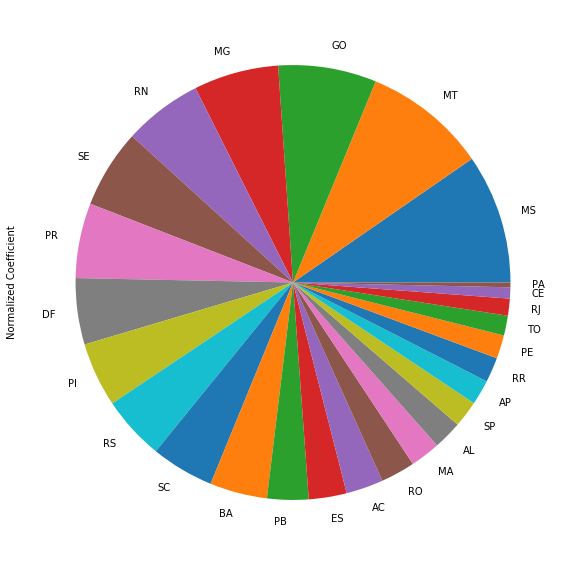

In [34]:
coef10days['Normalized Coefficient'] = (coef10days['coefficient']-coef10days['coefficient'].min())/(coef10days['coefficient'].max()-coef10days['coefficient'].min())

_ = coef10days.plot.pie(y='Normalized Coefficient', figsize=(10, 10), legend=False)

### R curve
Estimating R, that represents the basic reproduction rate of the disease. It roughly estimates how many people are infected by one infected person after 14 days, assuming a constant death rate for the infected.

It is a very simple and imprecise approach. And, specially, the values in the begining of the plot should be disregarded, because the first notifications of the infections are not representative or reliable.

The plot is more of a tendency indicator, than a real value estimator. 

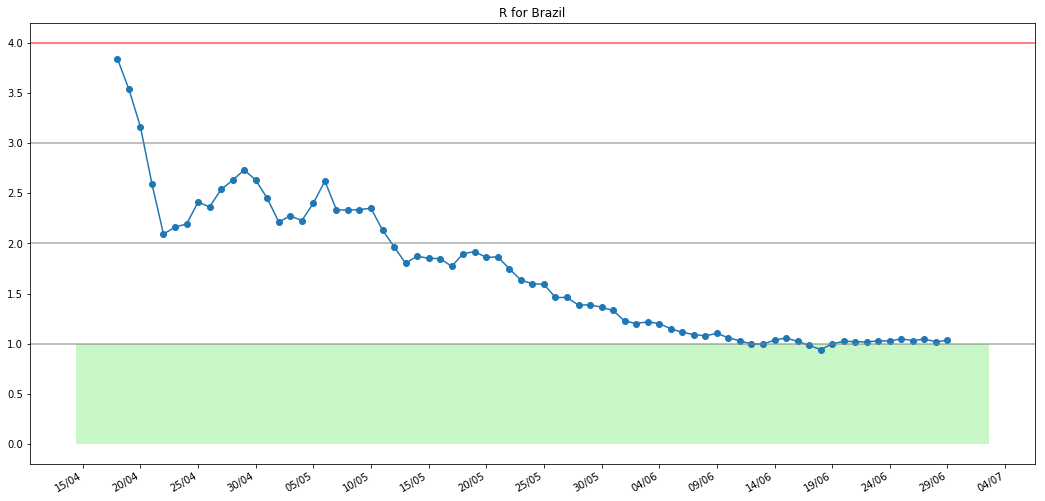

In [35]:

data = {'date': [],
        'value': []
       }
R_Brazil = pd.DataFrame (data, columns = ['date','value'])

# Generation Time
gt = 14

covidDeathsBR = covid.groupby('data')['obitosNovos'].sum().reset_index(name ='obitosNovos')
covidDeathsBR['rollingMean'] =covidDeathsBR['obitosNovos'].rolling(window=7).mean()

for day in range(covidDeathsBR.shape[0]):
    if day >= gt:
        if covidDeathsBR.at[day-gt,'rollingMean'] > 0:
            Rvalue = float(covidDeathsBR.at[day,'rollingMean'])/float(covidDeathsBR.at[day-gt,'rollingMean'])
            if Rvalue <= 4:
                R_Brazil = R_Brazil.append(pd.Series([covidDeathsBR.at[day, 'data'], Rvalue], index=R_Brazil.columns), ignore_index=True)

R_Brazil['date'] = pd.to_datetime(R_Brazil['date'], format='%Y-%m-%d')

R_Brazil.set_index('date', inplace=True)
axis = R_Brazil.plot(style='o-', figsize=(18, 9), legend=False, y='value', title='R for Brazil')
plt.gcf().autofmt_xdate()
plt.minorticks_off()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.axhline(1.0, color='gray', lw=2, alpha=0.5)
axis.axhline(2.0, color='gray', lw=2, alpha=0.5)
axis.axhline(3.0, color='gray', lw=2, alpha=0.5)
axis.axhline(4.0, color='red', lw=2, alpha=0.5)
axis.fill_between(axis.get_xlim(), 0., 1., facecolor='lightgreen', alpha=0.5)
axis.xaxis.get_label().set_visible(False)
plt.show()




In [36]:
data = {'date': [],
        'state': [],
        'value': []
       }
R_States = pd.DataFrame (data, columns = ['date','state', 'value'])


for state in covid.estado.unique():
    covidState = covid.loc[covid['estado'] == state]

    covidDeathsState = covidState.groupby('data')['obitosNovos'].sum().reset_index(name ='obitosNovos')
    covidDeathsState['rollingMean'] =covidDeathsState['obitosNovos'].rolling(window=7).mean()
    for day in range(covidDeathsState.shape[0]):
        if day >= gt:
            if covidDeathsState.at[day-gt,'rollingMean'] > 0:
                Rvalue = float(covidDeathsState.at[day,'rollingMean'])/float(covidDeathsState.at[day-gt,'rollingMean'])
                R_States = R_States.append(pd.Series([covidDeathsState.at[day, 'data'], state, Rvalue], index=R_States.columns), ignore_index=True)


R_States['date'] = pd.to_datetime(R_States['date'], format='%Y-%m-%d')

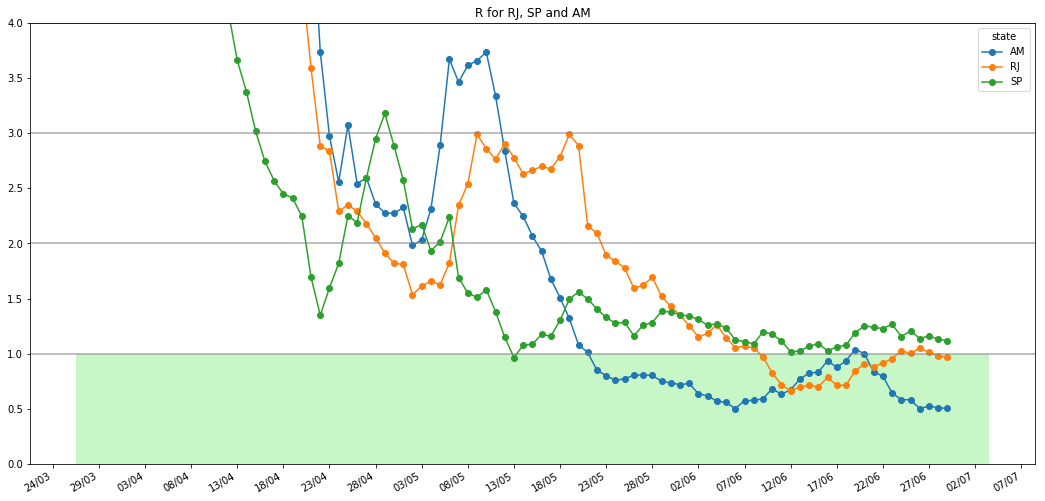

In [37]:
R_StatesGroup = R_States.loc[R_States['state'].isin(['RJ', 'SP', 'AM'])]
R_StatesGroup = R_StatesGroup.pivot(index='date', columns='state', values = 'value')

axis = R_StatesGroup.plot(style='o-', figsize=(18, 9), title='R for RJ, SP and AM')
plt.gcf().autofmt_xdate()
plt.minorticks_off()
axis.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
axis.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axis.axhline(1.0, color='gray', lw=2, alpha=0.5)
axis.axhline(2.0, color='gray', lw=2, alpha=0.5)
axis.axhline(3.0, color='gray', lw=2, alpha=0.5)
axis.axhline(4.0, color='red', lw=2, alpha=0.5)
axis.fill_between(axis.get_xlim(), 0., 1., facecolor='lightgreen', alpha=0.5)
plt.ylim((0,4))
axis.xaxis.get_label().set_visible(False)
_ = plt.show()